In [3]:
import pandas as pd

df = pd.read_csv('gt_df_results_SDCoT_spatialzones.csv')
df.columns

Index(['img_id', 'scan_name', 'classname', 'gt_index', 'has_pred_bbox',
       'spatial_zone'],
      dtype='object')

has_pred_bbox  False  True    recall
spatial_zone                        
1                  5    40  0.888889
2                115   419  0.784644
3                390  1510  0.794737
4                573  1312  0.696021


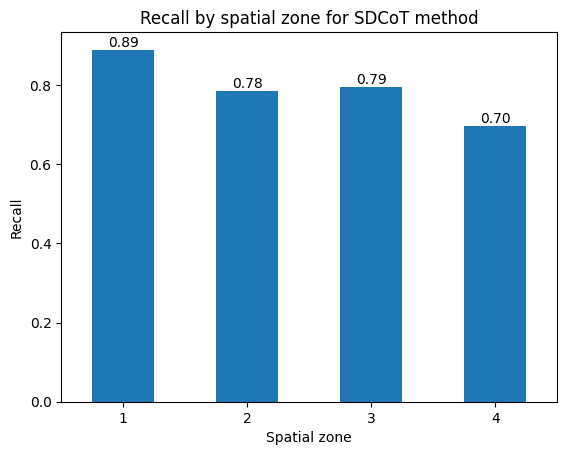

In [13]:
count_by_zone = df.groupby('spatial_zone')['has_pred_bbox'].value_counts().unstack().fillna(0)
count_by_zone['recall'] = count_by_zone[True] / (count_by_zone[True] + count_by_zone[False])
print(count_by_zone)

# Plot a bar chart of the recall by spatial zone
import matplotlib.pyplot as plt
count_by_zone['recall'].plot(kind='bar')
plt.title('Recall by spatial zone for SDCoT method')
plt.xlabel('Spatial zone')
plt.ylabel('Recall')
plt.xticks(rotation=0)

# Display the recall value as text on top of the bars
for i, recall in enumerate(count_by_zone['recall']):
    plt.text(i, recall, f'{recall:.2f}', ha='center', va='bottom')
    

plt.show()

In [17]:
# Count the number of True and False values for each class in each spatial zone
count_by_class_and_zone = df.groupby(['spatial_zone', 'classname'])['has_pred_bbox'].value_counts().unstack().fillna(0)
# Calculate recall (T/(T+F)) for each class in each spatial zone
count_by_class_and_zone['recall'] = count_by_class_and_zone[True] / (count_by_class_and_zone[True] + count_by_class_and_zone[False])
print(count_by_class_and_zone)

has_pred_bbox           False   True    recall
spatial_zone classname                        
1            bathtub      0.0    1.0  1.000000
             bookshelf    0.0    2.0  1.000000
             cabinet      0.0    2.0  1.000000
             chair        0.0   19.0  1.000000
             door         1.0    7.0  0.875000
...                       ...    ...       ...
4            sink        15.0   25.0  0.625000
             sofa         3.0   38.0  0.926829
             table       19.0  112.0  0.854962
             toilet       0.0   24.0  1.000000
             window      84.0   91.0  0.520000

[64 rows x 3 columns]


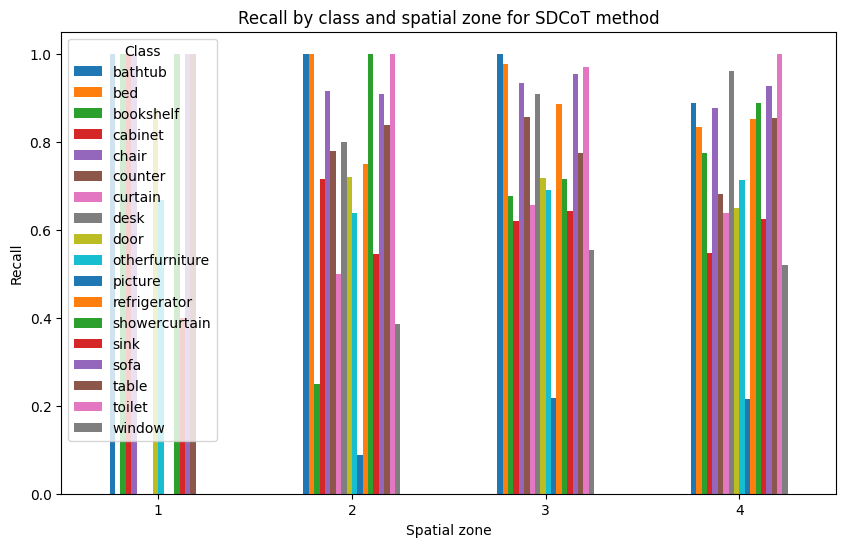

In [23]:
# Iterate over the classes and plot a bar chart of the recall by spatial zone
count_by_class_and_zone['recall'].unstack().plot(kind='bar', figsize=(10, 6))

plt.title('Recall by class and spatial zone for SDCoT method')
plt.xlabel('Spatial zone')
plt.ylabel('Recall')
plt.xticks(rotation=0)
plt.legend(title='Class')

plt.show()